## 問題設定
昼に暑いということは丸一日ずっと暑いと想像できるが、本当にそれは正しいのか。  
そこで、各都道府県の平均気温と最高気温がどのように関係があるのかを知りたい    
つまり、日本の各都道府県の平均気温を各都道府県の最高気温によって説明したい。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# データの読み込み SSDSE-B-2022.csv  有意水準5%
df = pd.read_csv("SSDSE-B-2022.csv", encoding="Shift JIS")
# 別途、前処理が必要であればすること
# データの内容を確認
df



,Unnamed: 0,Unnamed: 1,Unnamed: 2,年平均気温,最高気温（日最高気温の月平均の最高値）
0,2019,R01000,北海道,9.8,26.5
1,2018,R01000,北海道,9.5,25.7
2,2017,R01000,北海道,9.1,27.7
3,2016,R01000,北海道,9.3,28.3
4,2015,R01000,北海道,10.0,26.4
...,...,...,...,...,...
559,2012,R47000,沖縄県,23.0,31.8
560,2011,R47000,沖縄県,22.9,31.8
561,2010,R47000,沖縄県,23.1,31.6
562,2009,R47000,沖縄県,23.4,32.7


In [2]:
y = df["年平均気温"]
y

0       9.8
1       9.5
2       9.1
3       9.3
4      10.0
       ... 
559    23.0
560    22.9
561    23.1
562    23.4
563    23.4
Name: 年平均気温, Length: 564, dtype: float64

In [3]:
x = df["最高気温（日最高気温の月平均の最高値）"]
x

0      26.5
1      25.7
2      27.7
3      28.3
4      26.4
       ... 
559    31.8
560    31.8
561    31.6
562    32.7
563    32.3
Name: 最高気温（日最高気温の月平均の最高値）, Length: 564, dtype: float64

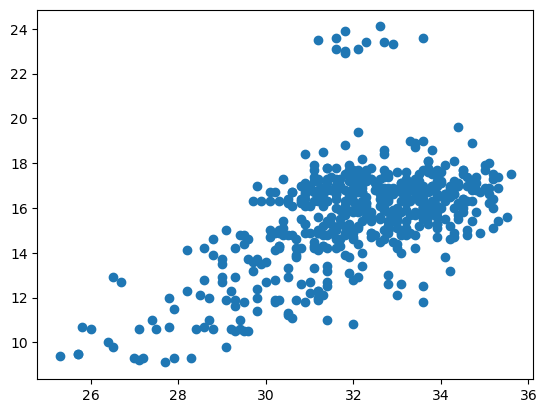

In [4]:
plt.scatter(x, y)

外れ値があり、散布図はおおよそ直線である。

In [5]:
pd.read_csv('SSDSE-B-2022.csv',encoding='SHIFT-JIS')

,Unnamed: 0,Unnamed: 1,Unnamed: 2,年平均気温,最高気温（日最高気温の月平均の最高値）
0,2019,R01000,北海道,9.8,26.5
1,2018,R01000,北海道,9.5,25.7
2,2017,R01000,北海道,9.1,27.7
3,2016,R01000,北海道,9.3,28.3
4,2015,R01000,北海道,10.0,26.4
...,...,...,...,...,...
559,2012,R47000,沖縄県,23.0,31.8
560,2011,R47000,沖縄県,22.9,31.8
561,2010,R47000,沖縄県,23.1,31.6
562,2009,R47000,沖縄県,23.4,32.7


(-25.0, 25.0)

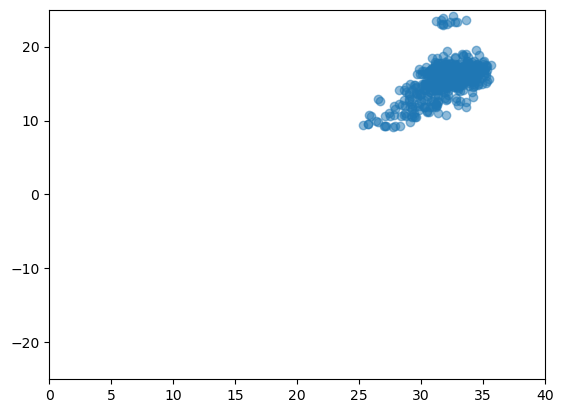

In [11]:
plt.scatter(x,y,alpha=0.5)
plt.xlim(xmin=0,xmax=40)
plt.ylim(ymin=-25,ymax=25)

In [58]:
beta_0 = -17
beta_1 = 1

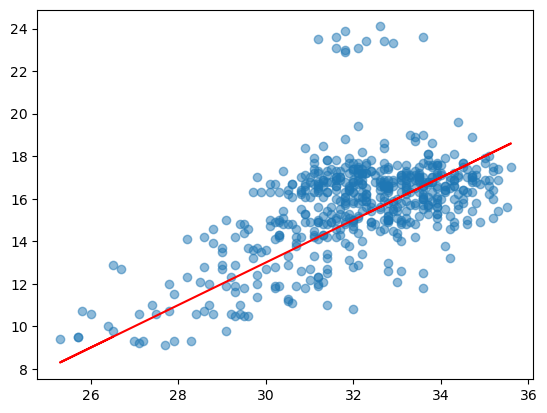

In [59]:
y_est = beta_0 + beta_1 * x
plt.scatter(x,y,alpha=0.5)
plt.plot(x,y_est,c="r")
plt.show()

In [60]:
resid = y_est - y

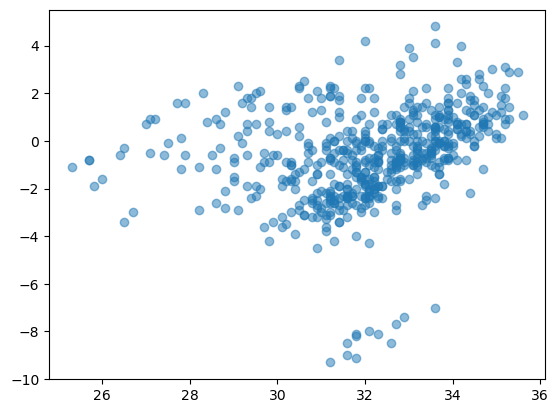

In [61]:
plt.scatter(x,resid,alpha=0.5)
plt.show()

In [62]:
np.sum(resid**2)

2370.89

In [65]:
log = {
    "切片":[-10,-20,-15,-17,-18,-17.5,17,7],
    "傾き":[1,1,1,1,1,1,1],
    "誤差2乗和":[25365.89,9435.89,3300.8900000000003,2370.89,3597.8899999999994,2843.39,3111.3499999999985]
}

In [68]:
import statsmodels.api as sm

In [69]:
X = sm.add_constant(x)
model = sm.OLS(y,X)
res = model.fit()
beta0_est,beta1_est = res.params

In [75]:
beta0_est,beta1_est

(-7.371161919794087, 0.7181349261925325)

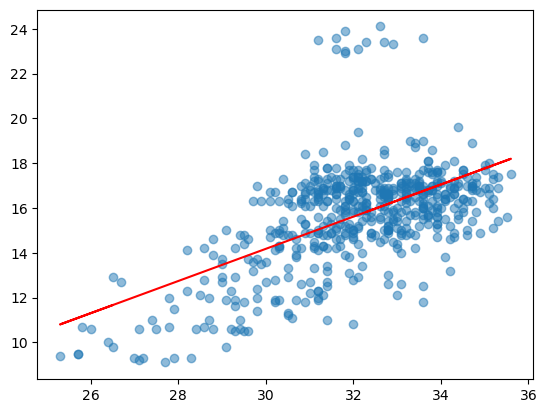

In [71]:
y_est = beta0_est + beta1_est*x
plt.scatter(x,y,alpha=0.5)
plt.plot(x,y_est,c="r")
plt.show()

In [72]:
resid = y_est -y

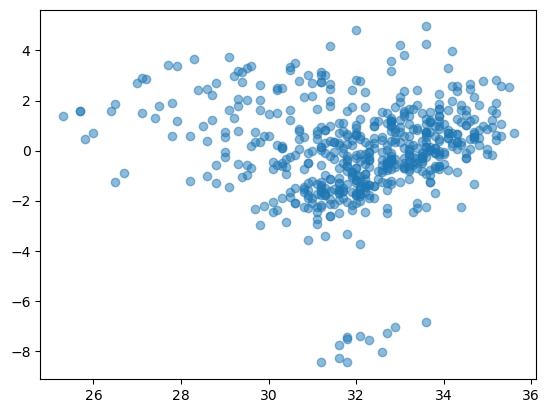

In [73]:
plt.scatter(x,resid,alpha=0.5)
plt.show()

In [74]:
np.sum(resid**2)

2024.0480449169374